## **ARTIFICIAL NEURAL NETWORK**

In [1]:
#LOADING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df= pd.read_csv("Alphabets_data.csv")

### EDA

In [3]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.shape

(20000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
# Statistical Summary
print("Summary statistics of numerical features:")
df.describe().T

Summary statistics of numerical features:


,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


### DATA VISUALIZATION

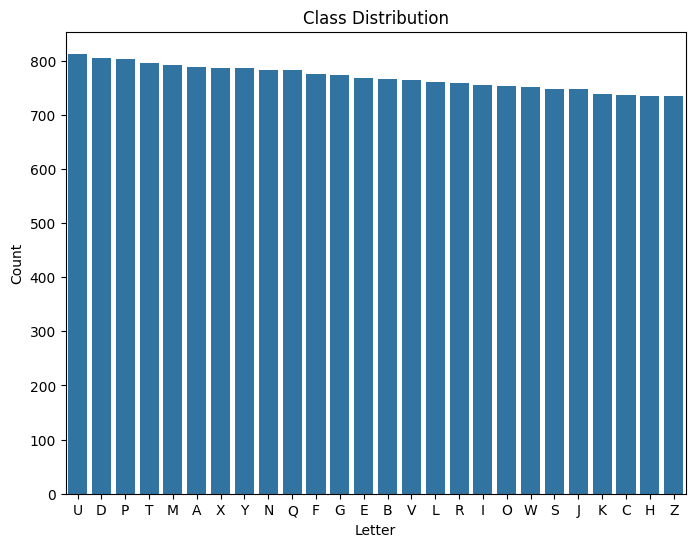

In [7]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='letter', data=df, order=df['letter'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

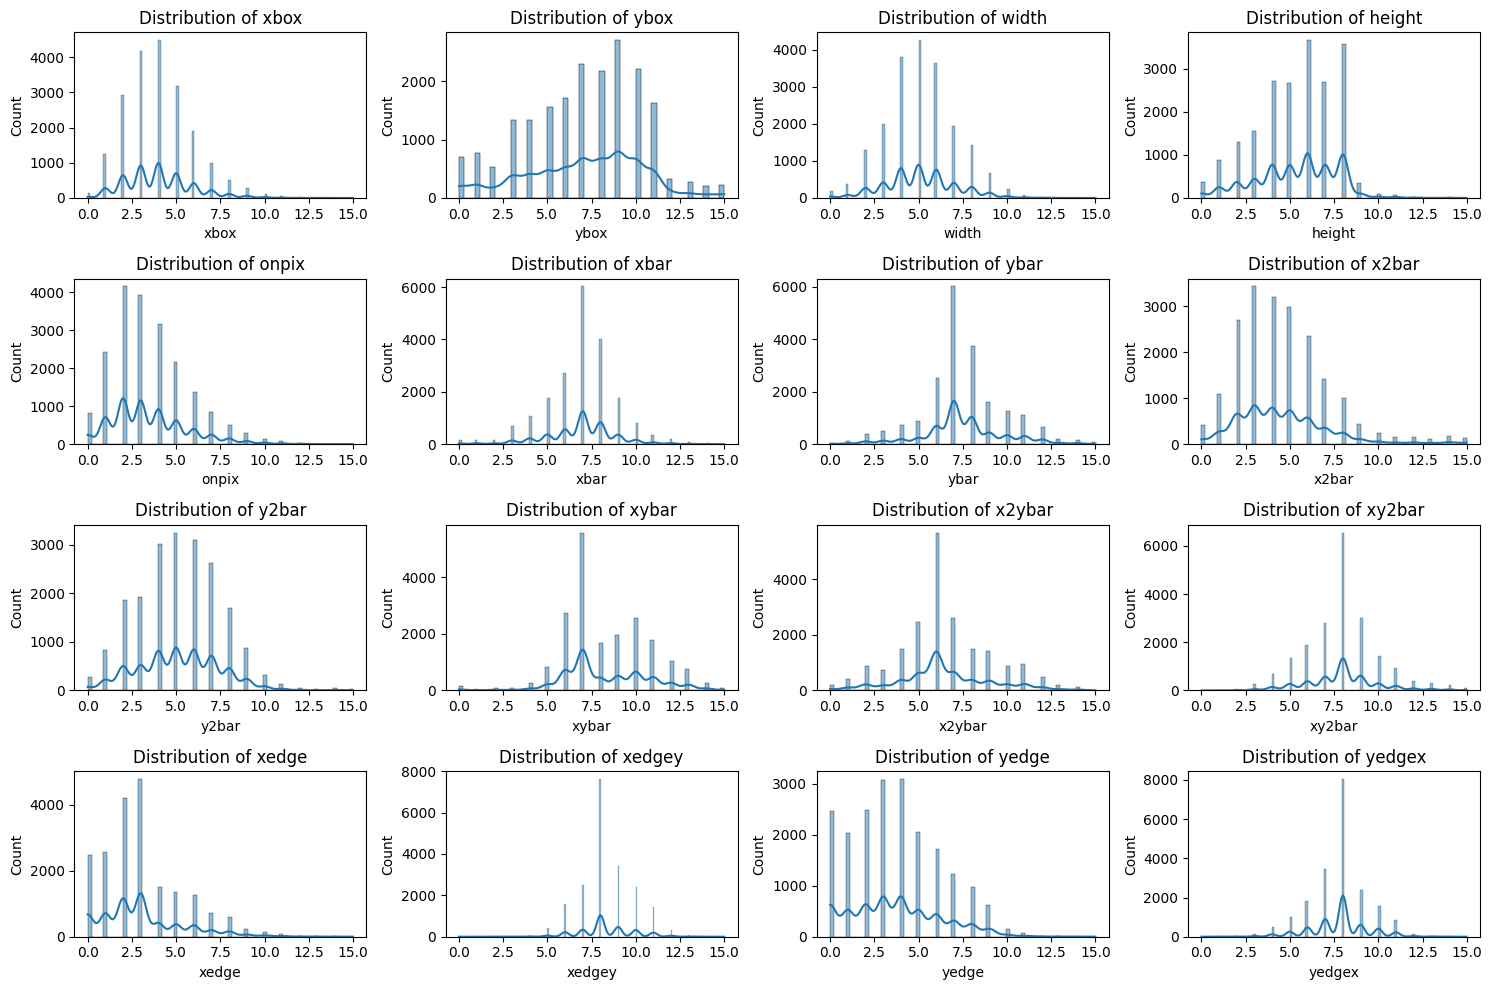

In [8]:
# Features distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[1:]):  # Exclude the 'letter' column
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### DATA CLEANING

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 1332


In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm the removal of duplicate rows
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


### DATA PREPROCESSING

In [12]:
# Separate target variable
X = df.drop(columns=['letter'])
y = df['letter']

In [13]:
# feature engineering (area)
X['area'] = X['width'] * X['height']
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,area
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,15
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,21
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,48
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,36
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,3


In [14]:
# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Handling Outliers using robust scaling.

In [15]:
from sklearn.preprocessing import RobustScaler

# Apply robust scaling to handle outliers
robust_scaler = RobustScaler()
X_scaled_robust = robust_scaler.fit_transform(X_scaled)


In [16]:
X_scaled_robust = pd.DataFrame(X_scaled_robust, columns=X.columns)
X_scaled_robust.head()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,area
0,-1.0,0.0,-1.0,-0.333333,-0.666667,0.5,2.000000,-1.333333,0.333333,-0.666667,1.333333,0.0,-1.5,0.0,-1.333333,0.0,-0.576923
1,0.5,0.8,-1.0,0.333333,-0.333333,1.5,-0.666667,0.333333,-0.333333,1.666667,-1.000000,0.5,-0.5,0.0,0.000000,1.0,-0.346154
2,0.0,0.6,0.5,0.666667,1.000000,1.5,-0.333333,-0.666667,0.333333,0.666667,-1.000000,-0.5,0.0,-1.0,-0.333333,0.5,0.692308
3,1.5,0.6,0.5,0.000000,0.000000,-1.0,0.666667,0.000000,0.333333,-1.333333,-0.666667,1.0,1.5,2.0,-0.666667,0.0,0.230769
4,-1.0,-1.4,-1.0,-1.666667,-0.666667,0.5,-0.333333,0.666667,0.333333,-0.666667,-0.333333,0.5,-1.0,-1.0,0.333333,1.0,-1.038462


In [17]:
#Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the target variable
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Convert encoded target back to DataFrame (optional)
y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=encoder.categories_[0])


In [18]:
y_encoded_df.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Building



In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_robust, y_encoded_df, test_size=0.2, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Define the model (optimizer='adam')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 16 neurons
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(26,activation='softmax') # Output layer with 26 neurons
])

In [22]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2369 - loss: 2.7087 - val_accuracy: 0.6194 - val_loss: 1.3757
Epoch 2/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6516 - loss: 1.2305 - val_accuracy: 0.6982 - val_loss: 1.0347
Epoch 3/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7077 - loss: 0.9950 - val_accuracy: 0.7343 - val_loss: 0.9107
Epoch 4/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7461 - loss: 0.8588 - val_accuracy: 0.7533 - val_loss: 0.8270
Epoch 5/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7662 - loss: 0.7776 - val_accuracy: 0.7571 - val_loss: 0.7745
Epoch 6/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7733 - loss: 0.7414 - val_accuracy: 0.7724 - val_loss: 0.7359
Epoch 7/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7973 - loss: 0.6720 - val_accuracy: 0.7935 - val_loss: 0.6747
Epoch 8/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8174 - loss: 0.6200 - val_accuracy: 0.

In [24]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2765
Train Loss: 0.28637921810150146
Train Accuracy: 0.910338819026947


In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8773 - loss: 0.3907
Test Loss: 0.3632674515247345
Test Accuracy: 0.886448860168457


In [26]:
# Define the model (optimizer='sgd')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])
# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0789 - loss: 3.2046 - val_accuracy: 0.2118 - val_loss: 2.9373
Epoch 2/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2380 - loss: 2.8173 - val_accuracy: 0.2919 - val_loss: 2.5093
Epoch 3/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3218 - loss: 2.3878 - val_accuracy: 0.3980 - val_loss: 2.1076
Epoch 4/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4362 - loss: 1.9972 - val_accuracy: 0.4842 - val_loss: 1.7802
Epoch 5/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5188 - loss: 1.6922 - val_accuracy: 0.5653 - val_loss: 1.5454
Epoch 6/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5786 - loss: 1.4867 - val_accuracy: 0.5996 - val_loss: 1.3898
Epoch 7/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6160 - loss: 1.3296 - val_accuracy: 0.6419 - val_loss: 1.2722
Epoch 8/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6517 - loss: 1.2233 - val_accuracy: 0.

In [27]:
# Define the model(optimizer='adagrad')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])
# Compiling the model
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0299 - loss: 3.3036 - val_accuracy: 0.0335 - val_loss: 3.2195
Epoch 2/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0430 - loss: 3.2037 - val_accuracy: 0.0490 - val_loss: 3.1557
Epoch 3/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0589 - loss: 3.1388 - val_accuracy: 0.0648 - val_loss: 3.1043
Epoch 4/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0720 - loss: 3.0926 - val_accuracy: 0.0822 - val_loss: 3.0583
Epoch 5/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0843 - loss: 3.0479 - val_accuracy: 0.1023 - val_loss: 3.0154
Epoch 6/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1016 - loss: 3.0097 - val_accuracy: 0.1197 - val_loss: 2.9746
Epoch 7/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1197 - loss: 2.9672 - val_accuracy: 0.1411 - val_loss: 2.9353
Epoch 8/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1414 - loss: 2.9235 - val_accuracy: 0.

Model with 64 neurons and ReLU activation in hidden layer and optmizer='adam' have given the best results of accuracy for training and test data.

Model summary:

Training Loss: 0.2863

Training Accuracy: 0.9103

Test Loss: 0.3632

Test Accuracy: 0.8864

The results show that the model performed  well on both the training and test datasets, with an accuracy of approximately 89% on the test data.

### Hyperparameter Tuning

In [28]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import product

In [29]:
# Define the grid search parameters
hidden_layers_options = [[64], [128], [128, 64]]  # Different configurations of hidden layers
activation_options = ['relu', 'tanh']            # Activation functions
learning_rate_options = [0.001, 0.01]            # Learning rates

In [30]:
# Grid search
best_model = None
best_accuracy = 0
best_params = {}

for hidden_layers, activation, lr in product(hidden_layers_options, activation_options, learning_rate_options):
    # Build the model
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    y_test_classes = np.argmax(y_test.values, axis=1)  # Convert y_test to class indices
    accuracy = accuracy_score(y_test_classes, y_pred)


    # Check for the best model
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
        best_params = {
            'hidden_layers': hidden_layers,
            'activation': activation,
            'learning_rate': lr
        }


In [31]:
# Output the results
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.9287627209426889
Best Parameters: {'hidden_layers': [128], 'activation': 'relu', 'learning_rate': 0.01}


### EVALUATION

In [33]:
#classification report of the model

from sklearn.metrics import classification_report
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)
print(classification_report(y_test_classes, y_pred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.94      0.87      0.91       156
           2       0.93      0.93      0.93       147
           3       0.85      0.96      0.90       163
           4       0.98      0.82      0.89       144
           5       0.87      0.95      0.91       146
           6       0.89      0.93      0.91       173
           7       0.89      0.89      0.89       133
           8       0.96      0.91      0.93       108
           9       0.92      0.97      0.94       150
          10       0.97      0.91      0.94       149
          11       0.93      0.94      0.93       147
          12       0.98      0.95      0.96       143
          13       0.94      0.95      0.95       138
          14       0.89      0.93      0.91       131
          15       0.99      0.88      0.93       161
          16       0.96      0.94      0

In [32]:
# evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred)
precision = precision_score(y_test_classes, y_pred, average='weighted') # Use weighted average for multi-class
recall = recall_score(y_test_classes, y_pred, average='weighted')
f1 = f1_score(y_test_classes, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9287627209426889
Precision: 0.9314020151214636
Recall: 0.9287627209426889
F1 Score: 0.9289149524363548


Based on evaluation, performance metrics of the model:


**Accuracy: 0.9287**

**Precision: 0.9314**

**Recall: 0.9287**

**F1-score: 0.9289**

The confusion matrix provides a detailed breakdown of the model's predictions for each class.

The diagonal elements represent the number of correctly classified instances for each class.

Off-diagonal elements represent misclassifications.


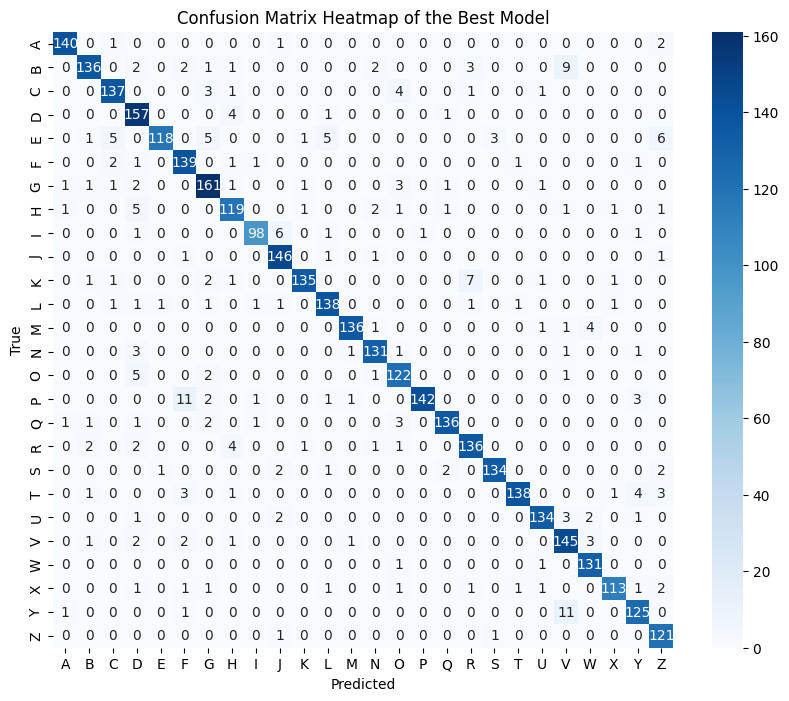

In [34]:
# confusion matrix heatmap of the best model

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap of the Best Model')
plt.show()

**Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.**

**Performance Analysis:**

Results of Initial Model
After handling duplicates and removing outliers, the initial model achieved a test accuracy of 0.8864 with a test loss of
 0.3632.The model performed reasonably well after data preprocessing.

Hyperparameter Tuning
In an effort to further enhance model performance, hyperparameter tuning was conducted. Various hyperparameters such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate were modified and evaluated.

Results of Tuned Model
The tuned model achieved a test accuracy of 0.9287, with a precision of 0.9314, recall of 0.9287, and F1-score of 0.9289. While the test accuracy of the tuned model was improved compared to the initial model, good improvements were observed in other performance metrics such as precision, recall, and F1-score.

Performance Comparison
The performance differences between the initial model and the tuned model were relatively visible. Although the tuned model exhibited good enhancements in precision, recall, and F1-score, the overall test accuracy improved in a noticeable manner. This also suggests that while hyperparameter tuning can lead to improvements in certain performance metrics, it may not always significantly impact overall accuracy.

Conclusion
In conclusion, the analysis of the ANN model's performance highlights the importance of data preprocessing and hyperparameter tuning in optimizing model performance.

Overall, this performance analysis provides insights into the iterative process of model development and optimization, aiming to achieve the best possible performance for the given task.

